In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression

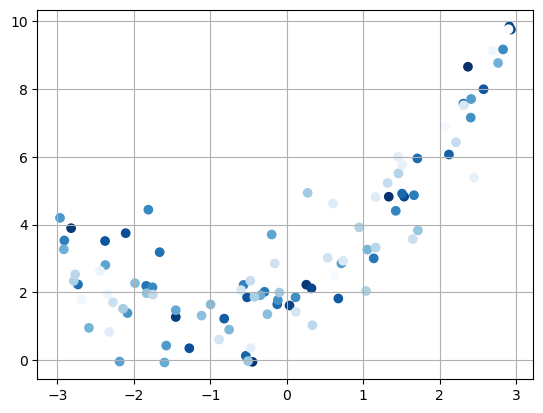

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
colors = np.linspace(0, 50, num=m)
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.grid()
plt.show()

In [4]:
def g(x):
    return np.c_[np.ones(x.shape), x, x ** 2]

In [5]:
theta = np.linalg.pinv(g(X)).dot(y)
theta

array([[1.9292023 ],
       [1.09827565],
       [0.51667636]])

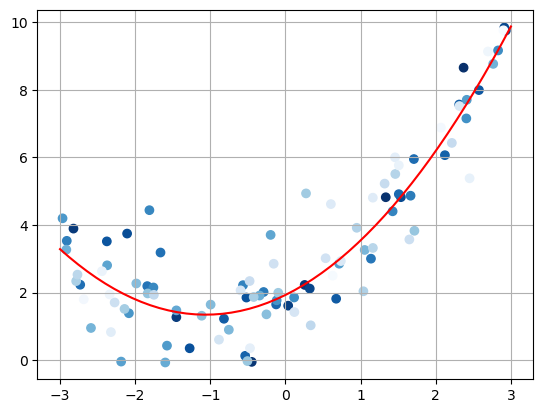

In [6]:
xSample = np.linspace(-3, 3, num=51).reshape(51, 1)
yPred = g(xSample).dot(theta)

plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.plot(xSample, yPred, color='red', linestyle='-')
plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polyReg = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyReg.fit_transform(X)

In [8]:
linReg = LinearRegression()
linReg.fit(xPoly, y)
linReg.intercept_, linReg.coef_

(array([1.9292023]), array([[1.09827565, 0.51667636]]))

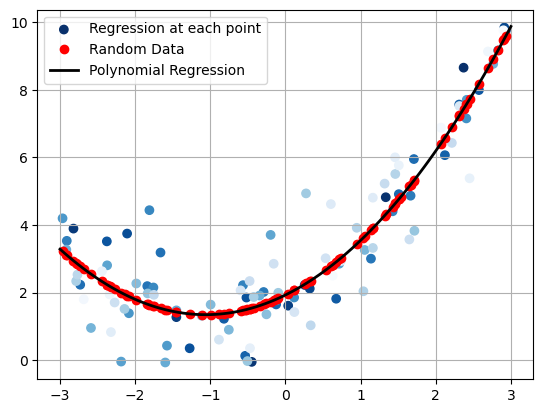

In [9]:
plt.scatter(X, y, c=colors, cmap='Blues_r', alpha=1.0)
plt.plot(X, linReg.predict(xPoly), 'ro')
a0 = linReg.intercept_
a1, a2 = linReg.coef_[0]
xSample = np.linspace(-3, 3, num=m)
plt.plot(xSample, a0 + a1 * xSample + a2 * xSample ** 2, color = 'black', linestyle='solid', linewidth=2)
plt.legend({'Random Data', 'Regression at each point', 'Polynomial Regression'})
plt.grid()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [11]:
xTraining, xTest, yTraining, yTest = train_test_split(X, y, test_size=0.2, random_state=1234) 

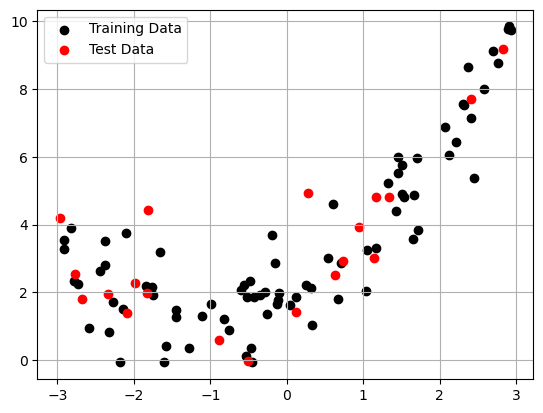

In [20]:
plt.scatter(xTraining, yTraining, label='Training Data', c='black')
plt.scatter(xTest, yTest, label='Test Data', c='red')
plt.legend()
plt.grid()
plt.show()

# 1st Degree Polynomial

In [21]:
p1Reg = LinearRegression()
p1Reg.fit(xTraining, yTraining)

LinearRegression()

# 2nd Degree Polynomial

In [22]:
p2Reg = Pipeline((
('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
('linear_reg', LinearRegression()),)
)
p2Reg.fit(xTraining, yTraining)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linear_reg', LinearRegression())])

# 10th Degree Polynomial

In [23]:
p10Reg = Pipeline((
('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
('linear_reg', LinearRegression()),)
)
p10Reg.fit(xTraining, yTraining)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linear_reg', LinearRegression())])

# 20th Degree Polynomial

In [24]:
p20Reg = Pipeline((
('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
('linear_reg', LinearRegression()),)
)
p20Reg.fit(xTraining, yTraining)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=20, include_bias=False)),
                ('linear_reg', LinearRegression())])

In [25]:
regressionList = [('$P(1)$', p1Reg), ('$P(2)$', p2Reg), ('$P(10)$', p10Reg), ('$P(20)$', p20Reg)]

$P(1)$ RMSE = 1.684, MAE = 1.429
$P(2)$ RMSE = 0.904, MAE = 0.700
$P(10)$ RMSE = 0.885, MAE = 0.675
$P(20)$ RMSE = 0.817, MAE = 0.633


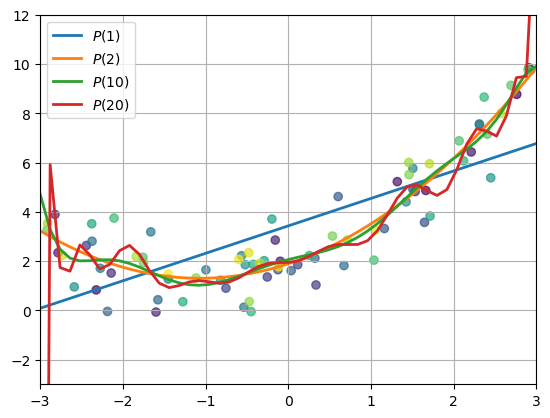

In [35]:
# Training the Model

from sklearn.metrics import mean_squared_error, mean_absolute_error
xPlot = np.linspace(-3, 3, num=51).reshape(51, 1)
colors = np.linspace(0, 10, num=len(xTraining))
plt.scatter(xTraining, yTraining, c=colors, cmap='viridis', alpha=0.7)

for reg in regressionList:
    plt.plot(xPlot, reg[1].predict(xPlot), label=reg[0], linewidth=2)
    yPred = reg[1].predict(xTraining)
    print(reg[0] + ' RMSE = %2.3f, MAE = %2.3f' %
         (np.sqrt(mean_squared_error(yTraining, yPred)), mean_absolute_error(yTraining, yPred)))

plt.grid()
plt.axis([-3, 3, -3, 12])
plt.legend()
plt.show()

$P(1)$: RMSE = 1.867, MAE = 1.566
$P(2)$: RMSE = 1.078, MAE = 0.768
$P(10)$: RMSE = 1.017, MAE = 0.683
$P(20)$: RMSE = 5.043, MAE = 1.843


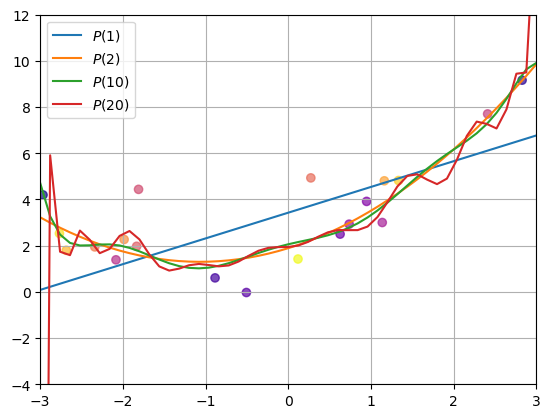

In [37]:
# Fitting in the test data
xPlot = np.linspace(-3, 3, num=51).reshape(51, 1)
colors = np.linspace(0, 10, num=len(xTest))
plt.scatter(xTest, yTest, c=colors, cmap='plasma', alpha=0.7)

for reg in regressionList:
    plt.plot(xPlot, reg[1].predict(xPlot), label=reg[0])
    yPred = reg[1].predict(xTest)
    print(reg[0] + ': RMSE = %2.3f, MAE = %2.3f' %
         (np.sqrt(mean_squared_error(yTest, yPred)), mean_absolute_error(yTest, yPred)))

plt.grid()
plt.axis([-3, 3, -4, 12])
plt.legend()
plt.show()

In [38]:
def plotLearningCurves(model, X, y):
    xTraining, xTest, yTraining, yTest = train_test_split(X, y, test_size=0.2, random_state=123)
    trainErrors, testErrors = [], []
    for m in range(1, len(xTraining) + 1):
        model.fit(xTraining[:m], yTraining[:m])
        yTrainPredict = model.predict(xTraining[:m])
        yTestPredict = model.predict(xTest)
        trainErrors.append(mean_squared_error(yTrainPredict, yTraining[:m]))
        testErrors.append(mean_squared_error(yTestPredict, yTest))
    
    plt.plot(range(1, len(xTraining) + 1), np.sqrt(trainErrors), label='Training Set', color = 'black')
    plt.plot(range(1, len(xTraining) + 1), np.sqrt(testErrors), label='Validation Set', color = 'red')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.grid()
    plt.legend()
    return trainErrors, testErrors

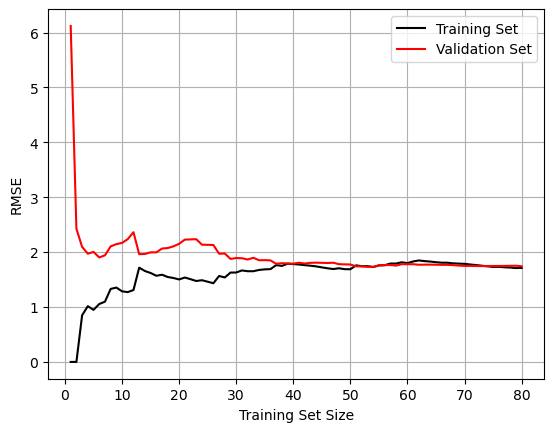

In [39]:
p1Training, p1Test = plotLearningCurves(p1Reg, X, y)

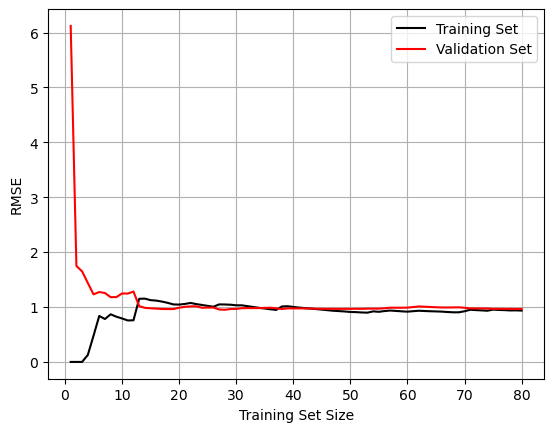

In [40]:
p2Training, p2Test = plotLearningCurves(p2Reg, X, y)

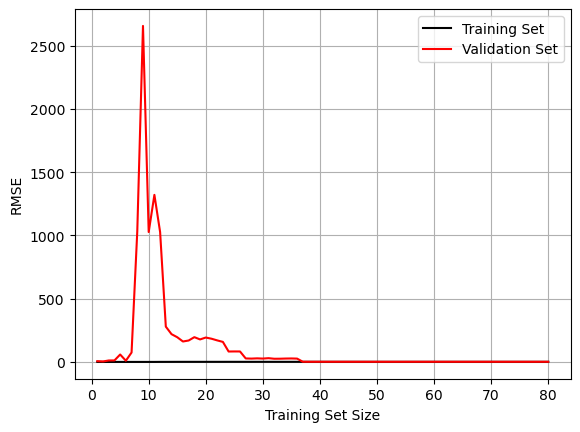

In [41]:
p10Training, p10Test = plotLearningCurves(p10Reg, X, y)

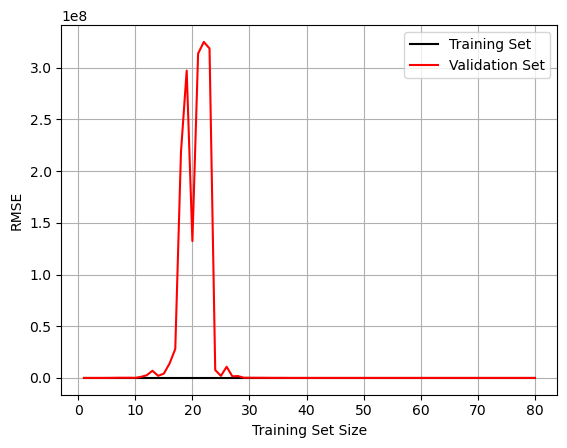

In [43]:
p20Training, p20Test = plotLearningCurves(p20Reg, X, y)

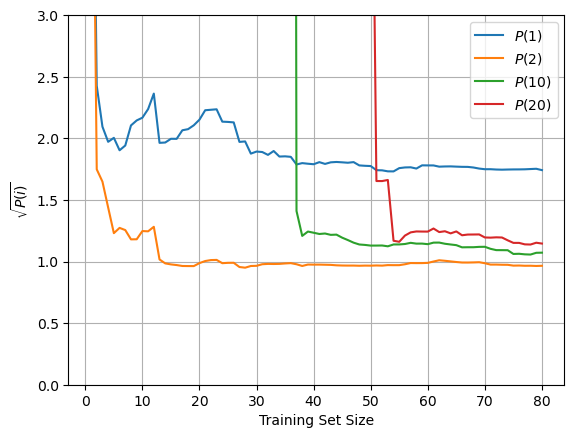

In [44]:
plt.plot(range(1, len(xTraining) + 1), np.sqrt(p1Test), label='$P(1)$')
plt.plot(range(1, len(xTraining) + 1), np.sqrt(p2Test), label='$P(2)$')
plt.plot(range(1, len(xTraining) + 1), np.sqrt(p10Test), label='$P(10)$')
plt.plot(range(1, len(xTraining) + 1), np.sqrt(p20Test), label='$P(20)$')

plt.ylabel('$\sqrt{P(i)}$')
plt.xlabel('Training Set Size')

plt.grid()
plt.legend()
plt.ylim((0, 3))
plt.show()